## Постановка задачи

Предобработать данные из датасета **Titanic**:

1. Определить, какие из данных могут быть бесполезны и избавьться от них.
2. Применить **one-hot encoding** к нечисловым данным.
3. Стандартизировать данные.

In [20]:
import numpy as np # импортируем библиотеку Numpy
import pandas as pd # импортируем библиотеку Pandas
import matplotlib.pyplot as plt # импортируем библиотеку Matplotlib

In [2]:
titanic_train_data = pd.read_csv('https://raw.githubusercontent.com/Andruchelli/Titanic/main/train.csv') # прочитаем файл с тренировочными данными

In [3]:
titanic_train_data.head() # проверяем, что файл прочитался

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train_data.shape # смотрим размерность датасета с тренировочными данными

(891, 12)

Считаем количество ячеек в столбцах датасета со значением NaN, которое не востребовано для дальнейшей предобработки данных

In [6]:
np.sum(titanic_train_data.isna())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Из полученных результатов можно сделать вывод, что большое количество данных в столбцах Age (возраст) и Cabin (номер каюты) отсутствует

In [8]:
titanic_train_data_dropna = titanic_train_data.dropna(axis=0) # избавляемся от строк, которые содержат значения NaN
titanic_train_data_dropna.shape # смотрим размерность обновлённого датасета

(183, 12)

Теперь применим **one-hot кодирование** для нечисловых данных.

Разделим столбец **Sex** (пол) на мужской и женский, а таже столбец **Embarked** (порт посадки) на отдельные значения: C = Cherbourg, Q = Queenstown, S = Southampton.

In [13]:
one_hot_category = pd.get_dummies(titanic_train_data_dropna[['Sex', 'Embarked']]) # проводим кодирование с помощью метода get_dummies
one_hot_category.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,0,1,0,0
3,1,0,0,0,1
6,0,1,0,0,1
10,1,0,0,0,1
11,1,0,0,0,1


Проведём стандартизацию для столбца **Fare** (стоимость билета), чтобы разница стоимости билетов разных пассажиров была менее явной:

<AxesSubplot:>

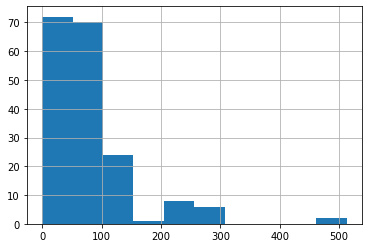

In [18]:
titanic_train_data_dropna['Fare'].hist() # строим гистограмму для данных в столбце Fare

Используем метод стандартизации:

$$X_{changed} = \frac{X - \mu}{\sigma}$$

(array([72., 70., 24.,  1.,  8.,  6.,  0.,  0.,  0.,  2.]),
 array([-1.03057881, -0.35953274,  0.31151334,  0.98255941,  1.65360548,
         2.32465155,  2.99569763,  3.6667437 ,  4.33778977,  5.00883584,
         5.67988192]),
 <BarContainer object of 10 artists>)

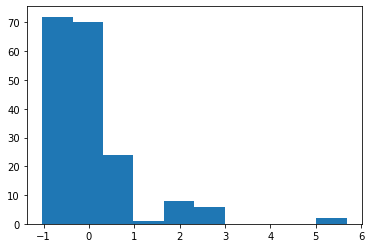

In [19]:
plt.hist((titanic_train_data_dropna['Fare'] - titanic_train_data_dropna['Fare'].mean()) / titanic_train_data_dropna['Fare'].std()) # из элементов массива вычетаем среднее и всё это делим на среднеквадратическое отклонение